# 3.4: Employee Performance Analysis

In [20]:
import pandas as pd
import numpy as np

### Data Loading and Processing

In [21]:
df = pd.read_csv("clinic_performance.csv")

In [22]:
df.isnull().values.any()

False

In [23]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'MaritalStatus', 'EmpJobRole',
       'DistanceFromHomeKm', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate',
       'EmpJobInvolvement', 'EmpJobSatisfaction', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'EmpWorkLifeBalance',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'Attrition',
       'PerformanceRating'],
      dtype='object')

In [24]:
df.head()

,EmpNumber,Age,Gender,MaritalStatus,EmpJobRole,DistanceFromHomeKm,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobSatisfaction,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,Attrition,PerformanceRating
0,E1001000,32,Male,Single,Critical care nurse,10,4,55,3,4,No,12,4,10,2,7,0,No,3
1,E1001006,47,Male,Single,Critical care nurse,14,4,42,3,1,No,12,4,20,3,7,1,No,3
2,E1001007,40,Male,Married,Critical care nurse,5,4,48,2,1,Yes,21,3,20,3,13,1,No,4
3,E1001009,41,Male,Divorced,Gerontological nurse,10,2,73,2,4,No,15,2,23,2,6,12,No,3
4,E1001010,60,Male,Single,Critical care nurse,16,1,84,3,1,No,14,4,10,3,2,2,No,3


In [25]:
df.describe()

,Age,DistanceFromHomeKm,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobSatisfaction,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,PerformanceRating
count,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000
mean,37.602848,9.594937,2.748418,66.079114,2.723101,2.737342,15.072785,2.655063,12.193038,2.764241,4.762658,2.520570,2.882911
std,8.916705,8.368334,1.095299,20.314954,0.710508,1.097756,3.560358,1.092260,7.616444,0.711989,3.552281,3.481837,0.553530
min,18.000000,1.000000,1.000000,30.000000,1.000000,1.000000,11.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000
25%,31.000000,2.000000,2.000000,48.000000,2.000000,2.000000,12.000000,2.000000,7.000000,2.000000,2.000000,0.000000,3.000000
50%,36.000000,7.000000,3.000000,67.000000,3.000000,3.000000,14.000000,3.000000,10.000000,3.000000,4.000000,1.000000,3.000000
75%,44.000000,15.000000,4.000000,83.250000,3.000000,4.000000,17.000000,4.000000,15.000000,3.000000,7.000000,4.000000,3.000000
max,60.000000,29.000000,4.000000,100.000000,4.000000,4.000000,25.000000,4.000000,38.000000,4.000000,17.000000,15.000000,4.000000


## Performance Analysis

C:\Users\ALIF\AppData\Local\Temp\ipykernel_4284\3508824075.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PerformanceRating'], hist=True, kde=False,


Text(0, 0.5, 'number of employees')

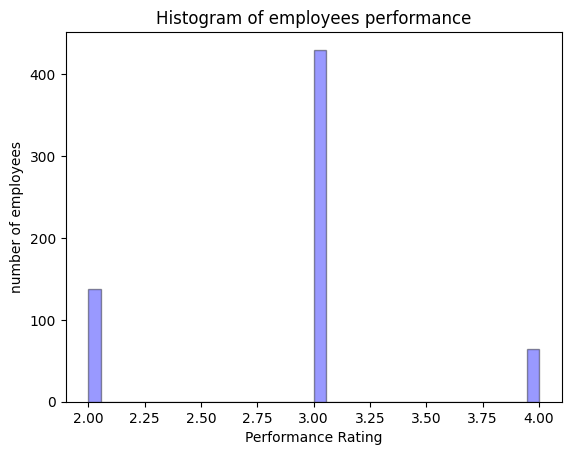

In [26]:
# Import the libraries
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df['PerformanceRating'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

# Add labels
plt.title('Histogram of employees performance')
plt.xlabel('Performance Rating')
plt.ylabel('number of employees')

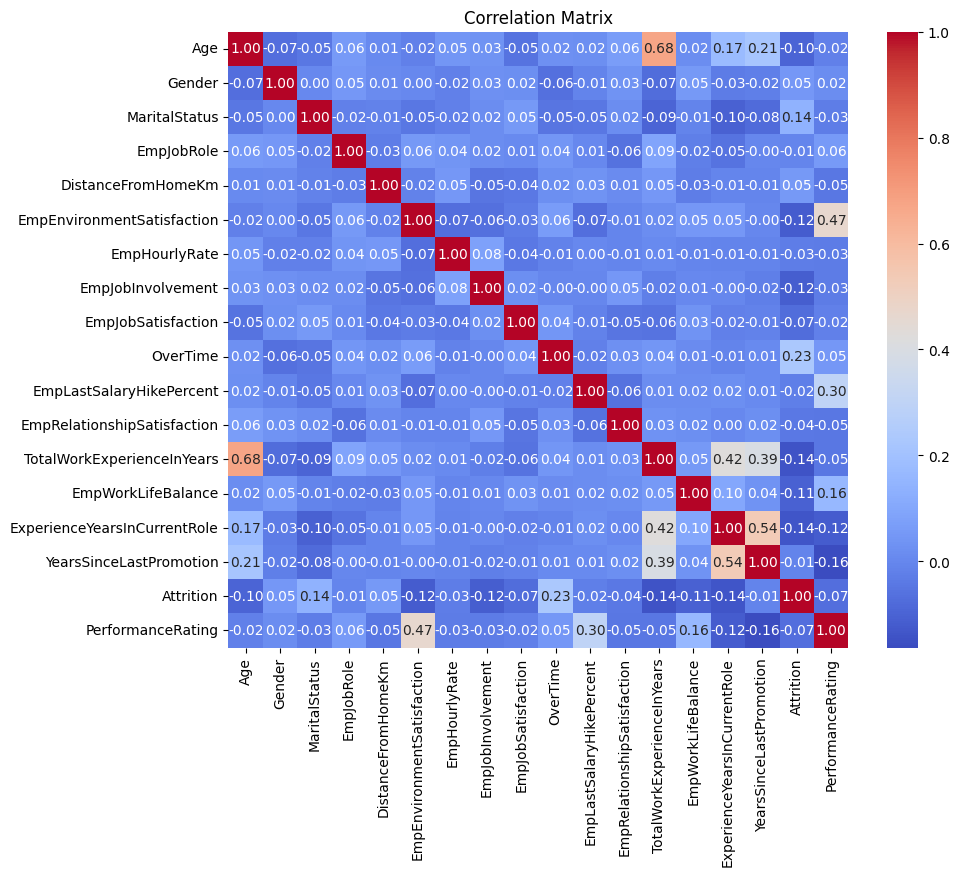

<Figure size 640x480 with 0 Axes>

In [27]:
from sklearn.preprocessing import LabelEncoder
# Read the data from the CSV file
df1 = pd.read_csv("clinic_performance.csv")

#  excluding EmpNumber 
X = df1.drop(columns=["EmpNumber"])

# Perform label encoding for categorical features
categorical_features = ["Gender", "MaritalStatus", "EmpJobRole", "OverTime", "Attrition"]
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [28]:
# Convert categorical data to numerical format using one-hot encoding
data = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target (y)
X = data.drop(columns=['PerformanceRating'])
y = data['PerformanceRating']

In [29]:
# Calculate Pearson correlation coefficients between each feature and the target variable
correlation_scores = X.apply(lambda feature: feature.corr(y))

# Create a DataFrame to store feature names and their correlation scores
feature_corr_df = pd.DataFrame({'Feature': correlation_scores.index, 'Correlation_Score': correlation_scores.values})
print(feature_corr_df)

                                  Feature  Correlation_Score
0                                     Age          -0.020032
1                      DistanceFromHomeKm          -0.047205
2              EmpEnvironmentSatisfaction           0.466283
3                           EmpHourlyRate          -0.033704
4                       EmpJobInvolvement          -0.034213
..                                    ...                ...
651          EmpJobRole_Nurse Anesthetist           0.040204
652  EmpJobRole_Occupational Health nurse           0.040250
653         EmpJobRole_Practitioner nurse          -0.017809
654                          OverTime_Yes           0.049486
655                         Attrition_Yes          -0.069272

[656 rows x 2 columns]


In [30]:
# Sort the DataFrame based on the absolute correlation scores in descending order
feature_corr_df['Abs_Correlation_Score'] = feature_corr_df['Correlation_Score'].abs()
feature_corr_df = feature_corr_df.sort_values(by='Abs_Correlation_Score', ascending=False)

# Print the most important features based on correlation scores
print("Most important features affecting performance:")
print(feature_corr_df.head(5))  # Change the number here to get more top features if needed


Most important features affecting performance:
                         Feature  Correlation_Score  Abs_Correlation_Score
2     EmpEnvironmentSatisfaction           0.466283               0.466283
6       EmpLastSalaryHikePercent           0.296237               0.296237
9             EmpWorkLifeBalance           0.163075               0.163075
11       YearsSinceLastPromotion          -0.162383               0.162383
10  ExperienceYearsInCurrentRole          -0.119738               0.119738


## MODEL: Predicting Employee Performance

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, r2_score, classification_report

# Extract the target variable (PerformanceRating) and features (excluding EmpNumber and PerformanceRating)
X = df.drop(columns=["EmpNumber", "PerformanceRating"])
y = df["PerformanceRating"]

# Perform label encoding for categorical features
categorical_features = ["Gender", "MaritalStatus", "EmpJobRole", "OverTime", "Attrition"]
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)



In [32]:
# Create and train the Gradient Boosting Machine model
#mlModelRF = RandomForestClassifier(random_state=42)
#mlModelRF.fit(X_train, y_train)

#logistic_model = LogisticRegression(random_state=42)
#logistic_model.fit(X_train, y_train)

gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)


# Make predictions on the test set
#y_pred = mlModelRF.predict(X_test)

#y_pred = logistic_model.predict(X_test)

y_pred = gbm_model.predict(X_test)


In [33]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

#R2 Score
r2 = r2_score(y_test, y_pred)
print ("R2 score ", r2)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Model Accuracy: 0.9315789473684211
R2 score  0.7647619047619048
Classification Report:
              precision    recall  f1-score   support

           2       0.95      0.91      0.93        45
           3       0.93      0.97      0.95       130
           4       0.83      0.67      0.74        15

    accuracy                           0.93       190
   macro avg       0.91      0.85      0.87       190
weighted avg       0.93      0.93      0.93       190

